In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.drop(axis=1, columns=['id'], inplace=True)

In [4]:
df.shape

(300000, 24)

In [5]:
df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [6]:
df.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
      dtype='object')

In [7]:
bin_df = df[['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']]
nom_df = df[['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']]
ord_df = df[['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']]
date_df = df[['month', 'day']]

In [8]:
bin_df.isnull().values.any()

False

In [9]:
nom_df.isnull().values.any()

False

In [10]:
ord_df.isnull().values.any()

False

In [11]:
date_df.isnull().values.any()

False

# BIN DF

In [12]:
bin_df['bin_0'].value_counts()

0    261749
1     38251
Name: bin_0, dtype: int64

In [13]:
bin_df['bin_1'].value_counts()

0    223018
1     76982
Name: bin_1, dtype: int64

In [14]:
bin_df['bin_2'].value_counts()

0    185033
1    114967
Name: bin_2, dtype: int64

In [15]:
bin_df['bin_3'].value_counts()

T    153535
F    146465
Name: bin_3, dtype: int64

In [16]:
bin_df['bin_4'].value_counts()

Y    191633
N    108367
Name: bin_4, dtype: int64

In [17]:
bin_df = pd.get_dummies(data=bin_df , columns=['bin_3', 'bin_4'], drop_first=True)

In [18]:
bin_df.head()

,bin_0,bin_1,bin_2,bin_3_T,bin_4_Y
0,0,0,0,1,1
1,0,1,0,1,1
2,0,0,0,0,1
3,0,1,0,0,1
4,0,0,0,0,0


# Nom DF

In [19]:
nom_df.head()

,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9
0,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51
1,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21
2,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0
3,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71
4,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7


In [20]:
print(nom_df['nom_0'].value_counts())
print(nom_df['nom_1'].value_counts())
print(nom_df['nom_2'].value_counts())
print(nom_df['nom_3'].value_counts())
print(nom_df['nom_4'].value_counts())

Green    127341
Blue      96166
Red       76493
Name: nom_0, dtype: int64
Trapezoid    101181
Square        49597
Star          45904
Circle        37320
Polygon       36143
Triangle      29855
Name: nom_1, dtype: int64
Lion       101295
Cat         49659
Snake       45979
Dog         37444
Axolotl     36136
Hamster     29487
Name: nom_2, dtype: int64
Russia        101123
Canada         49951
China          46044
Finland        36942
Costa Rica     35988
India          29952
Name: nom_3, dtype: int64
Oboe        92293
Piano       84517
Bassoon     68448
Theremin    54742
Name: nom_4, dtype: int64


In [21]:
print(nom_df['nom_5'].value_counts())
print(nom_df['nom_6'].value_counts())
print(nom_df['nom_7'].value_counts())
print(nom_df['nom_8'].value_counts())
print(nom_df['nom_9'].value_counts())

f7821e391    2801
06eeaf0aa    2750
472efea17    2729
20b10a832    2725
b97f51ac4    2717
             ... 
91c80026f      64
88f104c00      59
f802a9849      46
1fd0233cd      41
f710fca39      26
Name: nom_5, Length: 222, dtype: int64
d173ac7ca    1218
2ed5a94b0    1210
c9eedfbc2    1193
50d7ad46a    1175
0922e3cb8    1169
             ... 
26bf5ddd9      16
28630a5c8      12
8367b78fc      11
e97824431       8
4dcab4fc8       5
Name: nom_6, Length: 522, dtype: int64
3a114adea    534
6f3940b72    518
3b679e531    518
fcf2b8dce    517
fe27cc23d    515
            ... 
bc05442e1      3
2b5df4f24      3
446df0c98      3
74a1b69b1      2
3460d7c4b      1
Name: nom_7, Length: 1220, dtype: int64
c720f85ca    299
9ff6898e5    294
3cec7c3f5    292
d69adef8b    288
17ba84114    287
            ... 
5361d3b53      2
44f729e5a      2
4b30750de      1
83a266f13      1
40b8df5b6      1
Name: nom_8, Length: 2215, dtype: int64
163cc60fa    72
21578b358    70
e8be2364b    67
412859a59    67
f12f038c

In [22]:
nom_df.drop(axis=1, inplace=True, columns=['nom_5','nom_6','nom_7','nom_8','nom_9'])

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
nom_df.head()

,nom_0,nom_1,nom_2,nom_3,nom_4
0,Green,Triangle,Snake,Finland,Bassoon
1,Green,Trapezoid,Hamster,Russia,Piano
2,Blue,Trapezoid,Lion,Russia,Theremin
3,Red,Trapezoid,Snake,Canada,Oboe
4,Red,Trapezoid,Lion,Canada,Oboe


In [24]:
nom_0 = nom_df.groupby('nom_0')['nom_0'].count()
print(nom_0)

sum_nom_0 = nom_0.sum()
print(sum_nom_0)

dict_nom_0 = {}
for i in nom_0.index:
    dict_nom_0[i] = nom_0[i]/sum_nom_0
print(dict_nom_0)

nom_df.nom_0 = nom_df['nom_0'].map(dict_nom_0)

nom_0
Blue      96166
Green    127341
Red       76493
Name: nom_0, dtype: int64
300000
{'Blue': 0.32055333333333336, 'Green': 0.42447, 'Red': 0.2549766666666667}


/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
nom_1 = nom_df.groupby('nom_1')['nom_1'].count()
print(nom_1)

sum_nom_1 = nom_1.sum()
print(sum_nom_1)

dict_nom_1 = {}
for i in nom_1.index:
    dict_nom_1[i] = nom_1[i]/sum_nom_1
print(dict_nom_1)

nom_df.nom_1 = nom_df['nom_1'].map(dict_nom_1)

nom_1
Circle        37320
Polygon       36143
Square        49597
Star          45904
Trapezoid    101181
Triangle      29855
Name: nom_1, dtype: int64
300000
{'Circle': 0.1244, 'Polygon': 0.12047666666666666, 'Square': 0.16532333333333332, 'Star': 0.15301333333333333, 'Trapezoid': 0.33727, 'Triangle': 0.09951666666666667}


In [26]:
nom_2 = nom_df.groupby('nom_2')['nom_2'].count()
print(nom_2)

sum_nom_2 = nom_2.sum()
print(sum_nom_2)

dict_nom_2 = {}
for i in nom_2.index:
    dict_nom_2[i] = nom_2[i]/sum_nom_2
print(dict_nom_2)

nom_df.nom_2 = nom_df['nom_2'].map(dict_nom_2)

nom_2
Axolotl     36136
Cat         49659
Dog         37444
Hamster     29487
Lion       101295
Snake       45979
Name: nom_2, dtype: int64
300000
{'Axolotl': 0.12045333333333333, 'Cat': 0.16553, 'Dog': 0.12481333333333333, 'Hamster': 0.09829, 'Lion': 0.33765, 'Snake': 0.15326333333333333}


In [27]:
nom_3 = nom_df.groupby('nom_3')['nom_3'].count()
print(nom_3)

sum_nom_3 = nom_3.sum()
print(sum_nom_3)

dict_nom_3 = {}
for i in nom_3.index:
    dict_nom_3[i] = nom_3[i]/sum_nom_3
print(dict_nom_3)

nom_df.nom_3 = nom_df['nom_3'].map(dict_nom_3)

nom_3
Canada         49951
China          46044
Costa Rica     35988
Finland        36942
India          29952
Russia        101123
Name: nom_3, dtype: int64
300000
{'Canada': 0.16650333333333334, 'China': 0.15348, 'Costa Rica': 0.11996, 'Finland': 0.12314, 'India': 0.09984, 'Russia': 0.3370766666666667}


In [28]:
nom_4 = nom_df.groupby('nom_4')['nom_4'].count()
print(nom_4)

sum_nom_4 = nom_4.sum()
print(sum_nom_4)

dict_nom_4 = {}
for i in nom_4.index:
    dict_nom_4[i] = nom_4[i]/sum_nom_4
print(dict_nom_4)

nom_df.nom_4 = nom_df['nom_4'].map(dict_nom_4)

nom_4
Bassoon     68448
Oboe        92293
Piano       84517
Theremin    54742
Name: nom_4, dtype: int64
300000
{'Bassoon': 0.22816, 'Oboe': 0.3076433333333333, 'Piano': 0.2817233333333333, 'Theremin': 0.18247333333333332}


In [29]:
nom_df.head()

,nom_0,nom_1,nom_2,nom_3,nom_4
0,0.424470,0.099517,0.153263,0.123140,0.228160
1,0.424470,0.337270,0.098290,0.337077,0.281723
2,0.320553,0.337270,0.337650,0.337077,0.182473
3,0.254977,0.337270,0.153263,0.166503,0.307643
4,0.254977,0.337270,0.337650,0.166503,0.307643


# ORD DF

In [30]:
print(ord_df['ord_0'].value_counts())
print(ord_df['ord_1'].value_counts())
print(ord_df['ord_2'].value_counts())
print(ord_df['ord_3'].value_counts())
print(ord_df['ord_4'].value_counts())
print(ord_df['ord_5'].value_counts())

1    194846
2     66438
3     38716
Name: ord_0, dtype: int64
Novice         126583
Grandmaster     77428
Contributor     42871
Master          28053
Expert          25065
Name: ord_1, dtype: int64
Freezing       99816
Lava Hot       63908
Boiling Hot    60627
Cold           33768
Hot            22227
Warm           19654
Name: ord_2, dtype: int64
g    36405
l    36124
a    35276
k    28619
i    28048
h    24740
j    24647
f    22384
e    21331
b    11916
o    11320
d     7904
c     6944
n     4014
m      328
Name: ord_3, dtype: int64
L    19066
G    18899
S    18875
A    18258
R    16927
Q    15925
K    14698
I    14644
Z    14232
T    14220
V    14143
J    12878
P    12839
U    12775
H    12743
F    11717
E    11303
W     9197
Y     8490
X     6292
B     6169
O     5836
D     3974
C     3575
N     2166
M      159
Name: ord_4, dtype: int64
od    5019
fO    3435
Zq    2926
sD    2880
qP    2854
      ... 
eg      47
tv      40
kU      37
vq      35
Cl      28
Name: ord_5, Length: 192, 

In [31]:
dict_ord_0 = {
    1: 2,
    2: 1,
    3: 0
}
ord_df.ord_0 = ord_df['ord_0'].map(dict_ord_0)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
ord_1 = ord_df.groupby('ord_1')['ord_1'].count()
print(ord_1)

sum_ord_1 = ord_1.sum()
print(sum_ord_1)

dict_ord_1 = {}
for i in ord_1.index:
    dict_ord_1[i] = ord_1[i]/sum_ord_1
dict_ord_1

ord_1
Contributor     42871
Expert          25065
Grandmaster     77428
Master          28053
Novice         126583
Name: ord_1, dtype: int64
300000


{'Contributor': 0.14290333333333333,
 'Expert': 0.08355,
 'Grandmaster': 0.25809333333333334,
 'Master': 0.09351,
 'Novice': 0.42194333333333334}

In [33]:
ord_df.ord_1 = ord_df['ord_1'].map(dict_ord_1)

In [34]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.258093,Cold,h,D,kr
1,2,0.258093,Hot,a,A,bF
2,2,0.083550,Lava Hot,h,R,Jc
3,2,0.258093,Boiling Hot,i,D,kW
4,2,0.258093,Freezing,a,R,qP


In [35]:
ord_2 = ord_df.groupby('ord_2')['ord_2'].count()
print(ord_2)

sum_ord_2 = ord_2.sum()
print(sum_ord_2)

dict_ord_2 = {}
for i in ord_2.index:
    dict_ord_2[i] = ord_2[i]/sum_ord_2
dict_ord_2

ord_2
Boiling Hot    60627
Cold           33768
Freezing       99816
Hot            22227
Lava Hot       63908
Warm           19654
Name: ord_2, dtype: int64
300000


{'Boiling Hot': 0.20209,
 'Cold': 0.11256,
 'Freezing': 0.33272,
 'Hot': 0.07409,
 'Lava Hot': 0.21302666666666667,
 'Warm': 0.06551333333333334}

In [36]:
ord_df.ord_2 = ord_df['ord_2'].map(dict_ord_2)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.258093,0.112560,h,D,kr
1,2,0.258093,0.074090,a,A,bF
2,2,0.083550,0.213027,h,R,Jc
3,2,0.258093,0.202090,i,D,kW
4,2,0.258093,0.332720,a,R,qP


In [38]:
ord_3 = ord_df.groupby('ord_3')['ord_3'].count()
print(ord_3)

sum_ord_3 = ord_3.sum()
print(sum_ord_3)

dict_ord_3 = {}
for i in ord_3.index:
    dict_ord_3[i] = ord_3[i]/sum_ord_3
dict_ord_3

ord_3
a    35276
b    11916
c     6944
d     7904
e    21331
f    22384
g    36405
h    24740
i    28048
j    24647
k    28619
l    36124
m      328
n     4014
o    11320
Name: ord_3, dtype: int64
300000


{'a': 0.11758666666666667,
 'b': 0.03972,
 'c': 0.023146666666666666,
 'd': 0.026346666666666668,
 'e': 0.07110333333333334,
 'f': 0.07461333333333334,
 'g': 0.12135,
 'h': 0.08246666666666666,
 'i': 0.09349333333333333,
 'j': 0.08215666666666667,
 'k': 0.09539666666666667,
 'l': 0.12041333333333333,
 'm': 0.0010933333333333333,
 'n': 0.01338,
 'o': 0.037733333333333334}

In [39]:
ord_df.ord_3 = ord_df['ord_3'].map(dict_ord_3)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [40]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.258093,0.112560,0.082467,D,kr
1,2,0.258093,0.074090,0.117587,A,bF
2,2,0.083550,0.213027,0.082467,R,Jc
3,2,0.258093,0.202090,0.093493,D,kW
4,2,0.258093,0.332720,0.117587,R,qP


In [41]:
ord_4 = ord_df.groupby('ord_4')['ord_4'].count()
print(ord_4)

sum_ord_4 = ord_4.sum()
print(sum_ord_4)

dict_ord_4 = {}
for i in ord_4.index:
    dict_ord_4[i] = ord_4[i]/sum_ord_4
dict_ord_4

ord_4
A    18258
B     6169
C     3575
D     3974
E    11303
F    11717
G    18899
H    12743
I    14644
J    12878
K    14698
L    19066
M      159
N     2166
O     5836
P    12839
Q    15925
R    16927
S    18875
T    14220
U    12775
V    14143
W     9197
X     6292
Y     8490
Z    14232
Name: ord_4, dtype: int64
300000


{'A': 0.06086,
 'B': 0.020563333333333333,
 'C': 0.011916666666666667,
 'D': 0.013246666666666667,
 'E': 0.037676666666666664,
 'F': 0.03905666666666667,
 'G': 0.06299666666666667,
 'H': 0.04247666666666667,
 'I': 0.048813333333333334,
 'J': 0.04292666666666667,
 'K': 0.04899333333333333,
 'L': 0.06355333333333334,
 'M': 0.00053,
 'N': 0.00722,
 'O': 0.019453333333333333,
 'P': 0.04279666666666666,
 'Q': 0.05308333333333334,
 'R': 0.05642333333333333,
 'S': 0.06291666666666666,
 'T': 0.0474,
 'U': 0.042583333333333334,
 'V': 0.047143333333333336,
 'W': 0.030656666666666665,
 'X': 0.020973333333333333,
 'Y': 0.0283,
 'Z': 0.04744}

In [42]:
ord_df.ord_4 = ord_df['ord_4'].map(dict_ord_4)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.258093,0.112560,0.082467,0.013247,kr
1,2,0.258093,0.074090,0.117587,0.060860,bF
2,2,0.083550,0.213027,0.082467,0.056423,Jc
3,2,0.258093,0.202090,0.093493,0.013247,kW
4,2,0.258093,0.332720,0.117587,0.056423,qP


In [44]:
ord_5 = ord_df.groupby('ord_5')['ord_5'].count()
print(ord_5)

sum_ord_5 = ord_5.sum()
print(sum_ord_5)

dict_ord_5 = {}
for i in ord_5.index:
    dict_ord_5[i] = ord_5[i]/sum_ord_5
dict_ord_5

ord_5
AP    2614
Ai     893
Aj     553
BA     611
BE    1538
      ... 
xy    2279
yN     648
yY     733
yc    1229
zU    2360
Name: ord_5, Length: 192, dtype: int64
300000


{'AP': 0.008713333333333333,
 'Ai': 0.0029766666666666665,
 'Aj': 0.0018433333333333333,
 'BA': 0.0020366666666666667,
 'BE': 0.0051266666666666665,
 'Bb': 0.00577,
 'Bd': 0.009236666666666667,
 'Bn': 0.006183333333333333,
 'CL': 0.007073333333333333,
 'CM': 0.006156666666666667,
 'CU': 0.007286666666666667,
 'CZ': 0.009116666666666667,
 'Cl': 9.333333333333333e-05,
 'DH': 0.00105,
 'DN': 0.002746666666666667,
 'Dc': 0.006476666666666667,
 'Dx': 0.00779,
 'Ed': 0.00841,
 'Eg': 0.009,
 'Er': 0.006633333333333333,
 'FI': 0.0062,
 'Fd': 0.006826666666666667,
 'Fo': 0.0074,
 'GD': 0.00412,
 'GJ': 0.006866666666666667,
 'Gb': 0.009413333333333333,
 'Gx': 0.00654,
 'Hj': 0.00739,
 'IK': 0.0016633333333333333,
 'Id': 0.00022,
 'JX': 0.007586666666666667,
 'Jc': 0.008573333333333334,
 'Jf': 0.00025333333333333333,
 'Jt': 0.00484,
 'KR': 0.00499,
 'KZ': 0.00556,
 'Kf': 0.00048,
 'Kq': 0.008103333333333334,
 'LE': 0.007006666666666666,
 'MC': 0.00756,
 'MO': 0.004876666666666666,
 'MV': 0.008116

In [45]:
ord_df.ord_5 = ord_df['ord_5'].map(dict_ord_5)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.258093,0.112560,0.082467,0.013247,0.001687
1,2,0.258093,0.074090,0.117587,0.060860,0.008677
2,2,0.083550,0.213027,0.082467,0.056423,0.008573
3,2,0.258093,0.202090,0.093493,0.013247,0.008633
4,2,0.258093,0.332720,0.117587,0.056423,0.009513


# Final DF

In [47]:
date_df.head()

,month,day
0,2,2
1,8,7
2,2,7
3,1,2
4,8,7


In [48]:
bin_df.head()

,bin_0,bin_1,bin_2,bin_3_T,bin_4_Y
0,0,0,0,1,1
1,0,1,0,1,1
2,0,0,0,0,1
3,0,1,0,0,1
4,0,0,0,0,0


In [49]:
nom_df.head()

,nom_0,nom_1,nom_2,nom_3,nom_4
0,0.424470,0.099517,0.153263,0.123140,0.228160
1,0.424470,0.337270,0.098290,0.337077,0.281723
2,0.320553,0.337270,0.337650,0.337077,0.182473
3,0.254977,0.337270,0.153263,0.166503,0.307643
4,0.254977,0.337270,0.337650,0.166503,0.307643


In [50]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.258093,0.112560,0.082467,0.013247,0.001687
1,2,0.258093,0.074090,0.117587,0.060860,0.008677
2,2,0.083550,0.213027,0.082467,0.056423,0.008573
3,2,0.258093,0.202090,0.093493,0.013247,0.008633
4,2,0.258093,0.332720,0.117587,0.056423,0.009513


In [51]:
final_df = pd.concat([bin_df, nom_df, ord_df, date_df, df.target], axis=1)

In [52]:
final_df.head()

,bin_0,bin_1,bin_2,bin_3_T,bin_4_Y,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,month,day,target
0,0,0,0,1,1,0.424470,0.099517,0.153263,0.123140,0.228160,1,0.258093,0.112560,0.082467,0.013247,0.001687,2,2,0
1,0,1,0,1,1,0.424470,0.337270,0.098290,0.337077,0.281723,2,0.258093,0.074090,0.117587,0.060860,0.008677,8,7,0
2,0,0,0,0,1,0.320553,0.337270,0.337650,0.337077,0.182473,2,0.083550,0.213027,0.082467,0.056423,0.008573,2,7,0
3,0,1,0,0,1,0.254977,0.337270,0.153263,0.166503,0.307643,2,0.258093,0.202090,0.093493,0.013247,0.008633,1,2,1
4,0,0,0,0,0,0.254977,0.337270,0.337650,0.166503,0.307643,2,0.258093,0.332720,0.117587,0.056423,0.009513,8,7,0


<AxesSubplot:>

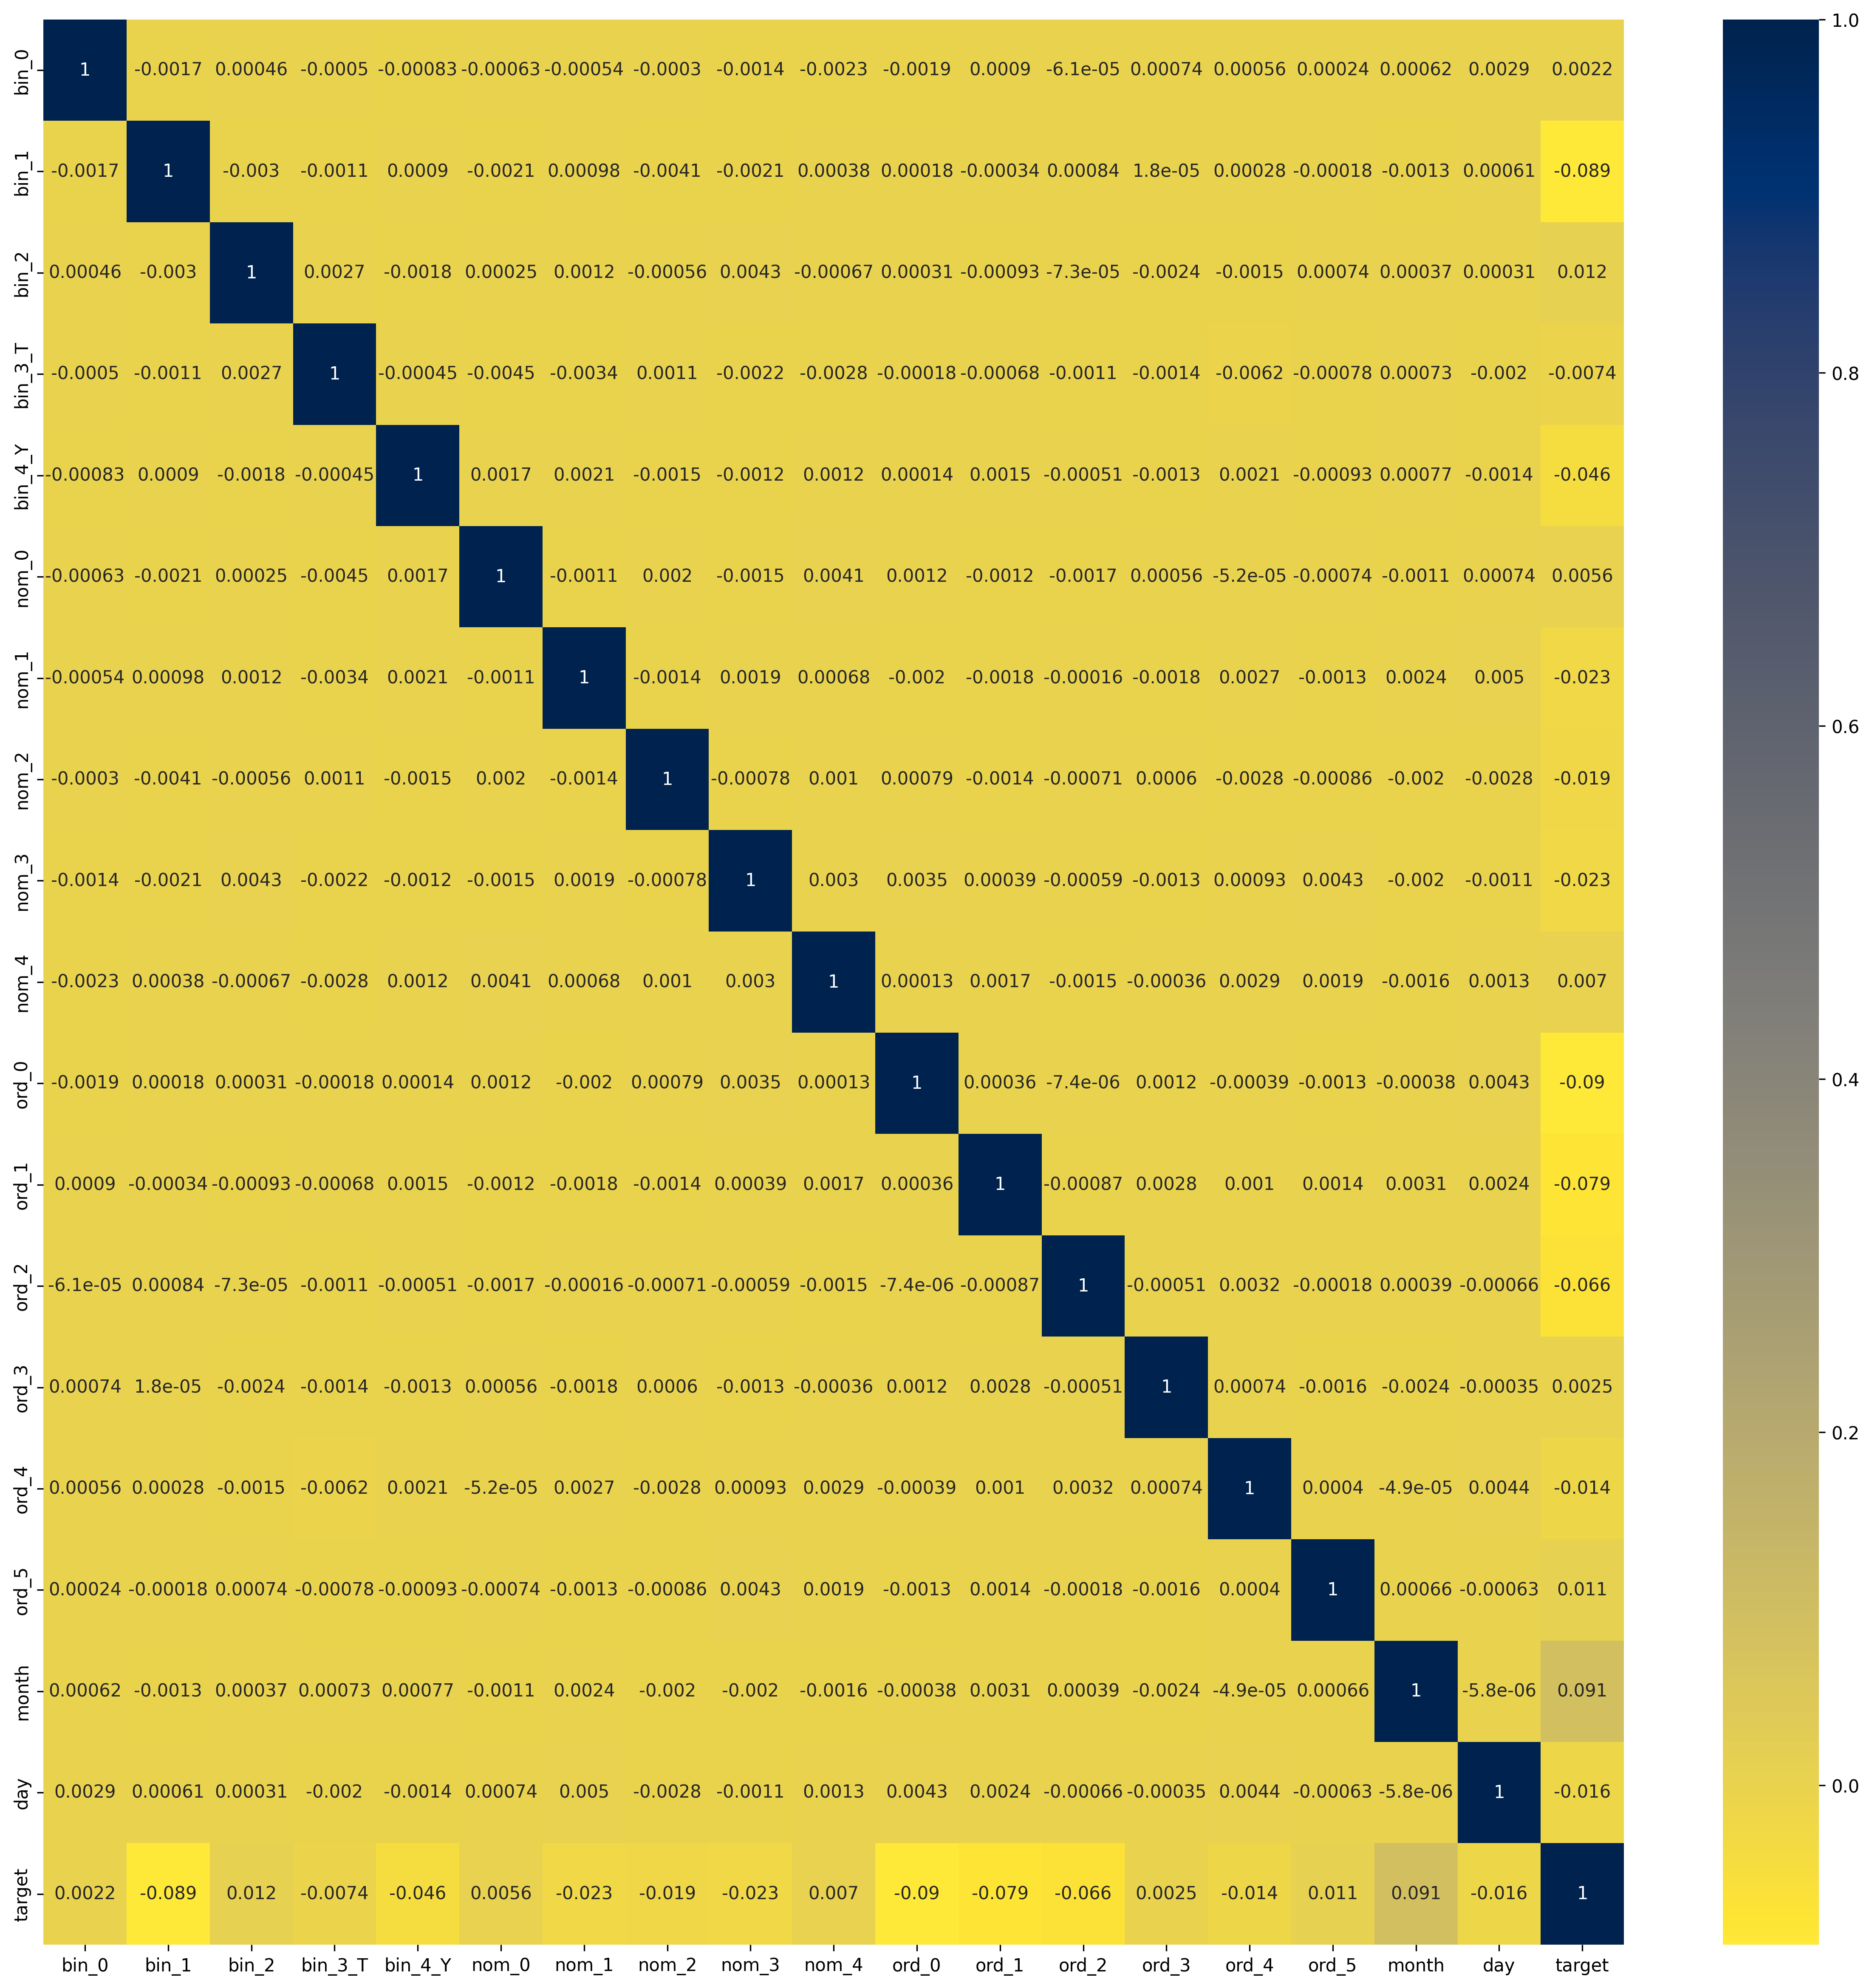

In [53]:
plt.figure(figsize=(20,20), dpi=300)
sns.heatmap(data=final_df.corr(), cmap=plt.cm.cividis_r, annot=True)

# Model Building

In [54]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [55]:
X = final_df.drop(columns=['target'], axis=1)
y= final_df.target

In [56]:
scaler = StandardScaler()

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [58]:
scaler = StandardScaler()

In [59]:
sc = scaler.fit(x_train)

In [60]:
x_train_scaled = sc.transform(x_train)

In [61]:
x_test_scaled = sc.transform(x_test)

In [62]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.21, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=300, n_jobs=-1,
              num_parallel_tree=5, predictor='auto', random_state=20,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
xgb.fit(x_train_scaled, y_train)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:38:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.21, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=-1,
              num_parallel_tree=5, predictor='auto', random_state=20,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
y_pred = xgb.predict(x_test_scaled)

In [65]:
y_pred 

array([1, 1, 0, ..., 1, 1, 0])

In [67]:
accuracy_score(y_test, y_pred) 

0.7261

In [68]:
print(confusion_matrix(y_test, y_pred))

[[18223  2605]
 [ 5612  3560]]


# Kaggle submission

In [69]:
test_df = pd.read_csv('test.csv')

In [70]:
ids = test_df.id 

In [71]:
test_df.drop(columns=['id'], axis=1, inplace=True)

In [72]:
test_df

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
199996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
199997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1
199998,1,0,0,T,Y,Blue,Star,Hamster,Costa Rica,Bassoon,...,606ac930b,d4cf587dd,2,Grandmaster,Boiling Hot,g,X,Ye,2,1


In [73]:
test_df = pd.get_dummies(data=test_df , columns=['bin_3', 'bin_4'], drop_first=True)

In [74]:
test_df.head() 

,bin_0,bin_1,bin_2,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,bin_3_T,bin_4_Y
0,0,0,1,Blue,Triangle,Axolotl,Finland,Piano,0870b0a5d,9ceb19dd6,...,2,Novice,Warm,j,P,be,5,11,1,1
1,0,0,0,Red,Square,Lion,Canada,Piano,a5c276589,1ad744242,...,1,Master,Lava Hot,l,A,RP,7,5,1,0
2,1,0,1,Blue,Square,Dog,China,Piano,568550f04,1fe17a1fd,...,2,Expert,Freezing,a,G,tP,1,12,0,1
3,0,0,1,Red,Star,Cat,China,Piano,c5725677e,a6542cec0,...,1,Contributor,Lava Hot,b,Q,ke,2,3,1,1
4,0,1,1,Red,Trapezoid,Dog,China,Piano,e70a6270d,97b6a3518,...,3,Grandmaster,Lava Hot,l,W,qK,4,11,0,0


In [75]:
test_df.drop(axis=1, inplace=True, columns=['nom_5','nom_6','nom_7','nom_8','nom_9'])

In [76]:
test_df.head()

,bin_0,bin_1,bin_2,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,bin_3_T,bin_4_Y
0,0,0,1,Blue,Triangle,Axolotl,Finland,Piano,2,Novice,Warm,j,P,be,5,11,1,1
1,0,0,0,Red,Square,Lion,Canada,Piano,1,Master,Lava Hot,l,A,RP,7,5,1,0
2,1,0,1,Blue,Square,Dog,China,Piano,2,Expert,Freezing,a,G,tP,1,12,0,1
3,0,0,1,Red,Star,Cat,China,Piano,1,Contributor,Lava Hot,b,Q,ke,2,3,1,1
4,0,1,1,Red,Trapezoid,Dog,China,Piano,3,Grandmaster,Lava Hot,l,W,qK,4,11,0,0


In [77]:
nom_df = test_df[['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']]
nom_df.head() 

,nom_0,nom_1,nom_2,nom_3,nom_4
0,Blue,Triangle,Axolotl,Finland,Piano
1,Red,Square,Lion,Canada,Piano
2,Blue,Square,Dog,China,Piano
3,Red,Star,Cat,China,Piano
4,Red,Trapezoid,Dog,China,Piano


In [78]:
nom_0 = nom_df.groupby('nom_0')['nom_0'].count()
print(nom_0)

sum_nom_0 = nom_0.sum()
print(sum_nom_0)

dict_nom_0 = {}
for i in nom_0.index:
    dict_nom_0[i] = nom_0[i]/sum_nom_0
print(dict_nom_0)

nom_df.nom_0 = nom_df['nom_0'].map(dict_nom_0)

nom_0
Blue     63762
Green    85155
Red      51083
Name: nom_0, dtype: int64
200000
{'Blue': 0.31881, 'Green': 0.425775, 'Red': 0.255415}


/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [79]:
nom_1 = nom_df.groupby('nom_1')['nom_1'].count()
print(nom_1)

sum_nom_1 = nom_1.sum()
print(sum_nom_1)

dict_nom_1 = {}
for i in nom_1.index:
    dict_nom_1[i] = nom_1[i]/sum_nom_1
print(dict_nom_1)

nom_df.nom_1 = nom_df['nom_1'].map(dict_nom_1)

nom_1
Circle       24798
Polygon      24309
Square       33036
Star         30772
Trapezoid    67250
Triangle     19835
Name: nom_1, dtype: int64
200000
{'Circle': 0.12399, 'Polygon': 0.121545, 'Square': 0.16518, 'Star': 0.15386, 'Trapezoid': 0.33625, 'Triangle': 0.099175}


In [80]:
nom_2 = nom_df.groupby('nom_2')['nom_2'].count()
print(nom_2)

sum_nom_2 = nom_2.sum()
print(sum_nom_2)

dict_nom_2 = {}
for i in nom_2.index:
    dict_nom_2[i] = nom_2[i]/sum_nom_2
print(dict_nom_2)

nom_df.nom_2 = nom_df['nom_2'].map(dict_nom_2)

nom_2
Axolotl    23767
Cat        33230
Dog        24922
Hamster    19738
Lion       67665
Snake      30678
Name: nom_2, dtype: int64
200000
{'Axolotl': 0.118835, 'Cat': 0.16615, 'Dog': 0.12461, 'Hamster': 0.09869, 'Lion': 0.338325, 'Snake': 0.15339}


In [81]:
nom_3 = nom_df.groupby('nom_3')['nom_3'].count()
print(nom_3)

sum_nom_3 = nom_3.sum()
print(sum_nom_3)

dict_nom_3 = {}
for i in nom_3.index:
    dict_nom_3[i] = nom_3[i]/sum_nom_3
print(dict_nom_3)

nom_df.nom_3 = nom_df['nom_3'].map(dict_nom_3)

nom_3
Canada        33035
China         30552
Costa Rica    24225
Finland       25028
India         19803
Russia        67357
Name: nom_3, dtype: int64
200000
{'Canada': 0.165175, 'China': 0.15276, 'Costa Rica': 0.121125, 'Finland': 0.12514, 'India': 0.099015, 'Russia': 0.336785}


In [82]:
nom_4 = nom_df.groupby('nom_4')['nom_4'].count()
print(nom_4)

sum_nom_4 = nom_4.sum()
print(sum_nom_4)

dict_nom_4 = {}
for i in nom_4.index:
    dict_nom_4[i] = nom_4[i]/sum_nom_4
print(dict_nom_4)

nom_df.nom_4 = nom_df['nom_4'].map(dict_nom_4)

nom_4
Bassoon     45616
Oboe        61399
Piano       56491
Theremin    36494
Name: nom_4, dtype: int64
200000
{'Bassoon': 0.22808, 'Oboe': 0.306995, 'Piano': 0.282455, 'Theremin': 0.18247}


In [83]:
nom_df.head()

,nom_0,nom_1,nom_2,nom_3,nom_4
0,0.318810,0.099175,0.118835,0.125140,0.282455
1,0.255415,0.165180,0.338325,0.165175,0.282455
2,0.318810,0.165180,0.124610,0.152760,0.282455
3,0.255415,0.153860,0.166150,0.152760,0.282455
4,0.255415,0.336250,0.124610,0.152760,0.282455


In [84]:
test_df.drop(axis=1, inplace=True, columns=['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'])

In [85]:
test_df.head() 

,bin_0,bin_1,bin_2,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,bin_3_T,bin_4_Y
0,0,0,1,2,Novice,Warm,j,P,be,5,11,1,1
1,0,0,0,1,Master,Lava Hot,l,A,RP,7,5,1,0
2,1,0,1,2,Expert,Freezing,a,G,tP,1,12,0,1
3,0,0,1,1,Contributor,Lava Hot,b,Q,ke,2,3,1,1
4,0,1,1,3,Grandmaster,Lava Hot,l,W,qK,4,11,0,0


In [86]:
test_df = pd.concat([test_df, nom_df], axis=1)
test_df.head() 

,bin_0,bin_1,bin_2,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,bin_3_T,bin_4_Y,nom_0,nom_1,nom_2,nom_3,nom_4
0,0,0,1,2,Novice,Warm,j,P,be,5,11,1,1,0.318810,0.099175,0.118835,0.125140,0.282455
1,0,0,0,1,Master,Lava Hot,l,A,RP,7,5,1,0,0.255415,0.165180,0.338325,0.165175,0.282455
2,1,0,1,2,Expert,Freezing,a,G,tP,1,12,0,1,0.318810,0.165180,0.124610,0.152760,0.282455
3,0,0,1,1,Contributor,Lava Hot,b,Q,ke,2,3,1,1,0.255415,0.153860,0.166150,0.152760,0.282455
4,0,1,1,3,Grandmaster,Lava Hot,l,W,qK,4,11,0,0,0.255415,0.336250,0.124610,0.152760,0.282455


In [87]:
ord_df = test_df[['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']]
ord_df.sample() 

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
30525,3,Grandmaster,Freezing,o,Z,xy


In [88]:
ord_df.ord_0.value_counts()

1    130045
2     44346
3     25609
Name: ord_0, dtype: int64

In [89]:
dict_ord_0 = {
    1: 2,
    2: 1,
    3: 0
}
ord_df.ord_0 = ord_df['ord_0'].map(dict_ord_0)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [90]:
ord_1 = ord_df.groupby('ord_1')['ord_1'].count()
print(ord_1)

sum_ord_1 = ord_1.sum()
print(sum_ord_1)

dict_ord_1 = {}
for i in ord_1.index:
    dict_ord_1[i] = ord_1[i]/sum_ord_1
dict_ord_1

ord_1
Contributor    28645
Expert         16644
Grandmaster    51715
Master         18702
Novice         84294
Name: ord_1, dtype: int64
200000


{'Contributor': 0.143225,
 'Expert': 0.08322,
 'Grandmaster': 0.258575,
 'Master': 0.09351,
 'Novice': 0.42147}

In [91]:
ord_df.ord_1 = ord_df['ord_1'].map(dict_ord_1)

In [92]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.421470,Warm,j,P,be
1,2,0.093510,Lava Hot,l,A,RP
2,1,0.083220,Freezing,a,G,tP
3,2,0.143225,Lava Hot,b,Q,ke
4,0,0.258575,Lava Hot,l,W,qK


In [93]:
ord_2 = ord_df.groupby('ord_2')['ord_2'].count()
print(ord_2)

sum_ord_2 = ord_2.sum()
print(sum_ord_2)

dict_ord_2 = {}
for i in ord_2.index:
    dict_ord_2[i] = ord_2[i]/sum_ord_2
dict_ord_2

ord_2
Boiling Hot    40636
Cold           22666
Freezing       66249
Hot            14517
Lava Hot       42741
Warm           13191
Name: ord_2, dtype: int64
200000


{'Boiling Hot': 0.20318,
 'Cold': 0.11333,
 'Freezing': 0.331245,
 'Hot': 0.072585,
 'Lava Hot': 0.213705,
 'Warm': 0.065955}

In [94]:
ord_df.ord_2 = ord_df['ord_2'].map(dict_ord_2)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [95]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.421470,0.065955,j,P,be
1,2,0.093510,0.213705,l,A,RP
2,1,0.083220,0.331245,a,G,tP
3,2,0.143225,0.213705,b,Q,ke
4,0,0.258575,0.213705,l,W,qK


In [96]:
ord_3 = ord_df.groupby('ord_3')['ord_3'].count()
print(ord_3)

sum_ord_3 = ord_3.sum()
print(sum_ord_3)

dict_ord_3 = {}
for i in ord_3.index:
    dict_ord_3[i] = ord_3[i]/sum_ord_3
dict_ord_3

ord_3
a    23384
b     7968
c     4627
d     5172
e    14303
f    14755
g    24303
h    16520
i    18968
j    16482
k    18685
l    24233
m      223
n     2687
o     7690
Name: ord_3, dtype: int64
200000


{'a': 0.11692,
 'b': 0.03984,
 'c': 0.023135,
 'd': 0.02586,
 'e': 0.071515,
 'f': 0.073775,
 'g': 0.121515,
 'h': 0.0826,
 'i': 0.09484,
 'j': 0.08241,
 'k': 0.093425,
 'l': 0.121165,
 'm': 0.001115,
 'n': 0.013435,
 'o': 0.03845}

In [97]:
ord_df.ord_3 = ord_df['ord_3'].map(dict_ord_3)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [98]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.421470,0.065955,0.082410,P,be
1,2,0.093510,0.213705,0.121165,A,RP
2,1,0.083220,0.331245,0.116920,G,tP
3,2,0.143225,0.213705,0.039840,Q,ke
4,0,0.258575,0.213705,0.121165,W,qK


In [99]:
ord_4 = ord_df.groupby('ord_4')['ord_4'].count()
print(ord_4)

sum_ord_4 = ord_4.sum()
print(sum_ord_4)

dict_ord_4 = {}
for i in ord_4.index:
    dict_ord_4[i] = ord_4[i]/sum_ord_4
dict_ord_4

ord_4
A    12314
B     4168
C     2504
D     2592
E     7244
F     7754
G    12633
H     8452
I     9588
J     8699
K     9790
L    12500
M      110
N     1438
O     3871
P     8597
Q    10622
R    11367
S    12898
T     9428
U     8520
V     9383
W     5986
X     4239
Y     5698
Z     9605
Name: ord_4, dtype: int64
200000


{'A': 0.06157,
 'B': 0.02084,
 'C': 0.01252,
 'D': 0.01296,
 'E': 0.03622,
 'F': 0.03877,
 'G': 0.063165,
 'H': 0.04226,
 'I': 0.04794,
 'J': 0.043495,
 'K': 0.04895,
 'L': 0.0625,
 'M': 0.00055,
 'N': 0.00719,
 'O': 0.019355,
 'P': 0.042985,
 'Q': 0.05311,
 'R': 0.056835,
 'S': 0.06449,
 'T': 0.04714,
 'U': 0.0426,
 'V': 0.046915,
 'W': 0.02993,
 'X': 0.021195,
 'Y': 0.02849,
 'Z': 0.048025}

In [100]:
ord_df.ord_4 = ord_df['ord_4'].map(dict_ord_4)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [101]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.421470,0.065955,0.082410,0.042985,be
1,2,0.093510,0.213705,0.121165,0.061570,RP
2,1,0.083220,0.331245,0.116920,0.063165,tP
3,2,0.143225,0.213705,0.039840,0.053110,ke
4,0,0.258575,0.213705,0.121165,0.029930,qK


In [102]:
ord_5 = ord_df.groupby('ord_5')['ord_5'].count()
print(ord_5)

sum_ord_5 = ord_5.sum()
print(sum_ord_5)

dict_ord_5 = {}
for i in ord_5.index:
    dict_ord_5[i] = ord_5[i]/sum_ord_5
dict_ord_5

ord_5
AP    1800
Ai     624
Aj     339
BA     364
BE    1067
      ... 
xy    1441
yN     438
yY     502
yc     892
zU    1554
Name: ord_5, Length: 192, dtype: int64
200000


{'AP': 0.009,
 'Ai': 0.00312,
 'Aj': 0.001695,
 'BA': 0.00182,
 'BE': 0.005335,
 'Bb': 0.005605,
 'Bd': 0.00916,
 'Bn': 0.00633,
 'CL': 0.00712,
 'CM': 0.00627,
 'CU': 0.00694,
 'CZ': 0.0087,
 'Cl': 9e-05,
 'DH': 0.00095,
 'DN': 0.00269,
 'Dc': 0.005935,
 'Dx': 0.00738,
 'Ed': 0.008245,
 'Eg': 0.008875,
 'Er': 0.006785,
 'FI': 0.00598,
 'Fd': 0.006785,
 'Fo': 0.00743,
 'GD': 0.003995,
 'GJ': 0.007415,
 'Gb': 0.00948,
 'Gx': 0.006295,
 'Hj': 0.00751,
 'IK': 0.00155,
 'Id': 0.00026,
 'JX': 0.00776,
 'Jc': 0.008515,
 'Jf': 0.00022,
 'Jt': 0.004405,
 'KR': 0.0051,
 'KZ': 0.005805,
 'Kf': 0.00044,
 'Kq': 0.008325,
 'LE': 0.006765,
 'MC': 0.007735,
 'MO': 0.004635,
 'MV': 0.00778,
 'Mf': 0.000925,
 'Ml': 0.00211,
 'Mx': 0.002365,
 'NV': 0.00456,
 'Nf': 0.004565,
 'Nk': 0.00687,
 'OR': 0.00173,
 'Ob': 0.0051,
 'Os': 0.001595,
 'PA': 0.007305,
 'PQ': 0.008615,
 'PZ': 0.005755,
 'Ps': 0.00147,
 'QM': 0.00484,
 'Qb': 0.003635,
 'Qh': 0.008125,
 'Qo': 0.008855,
 'RG': 0.003695,
 'RL': 0.00297,
 '

In [103]:
ord_df.ord_5 = ord_df['ord_5'].map(dict_ord_5)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [104]:
ord_df.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,0.421470,0.065955,0.082410,0.042985,0.007805
1,2,0.093510,0.213705,0.121165,0.061570,0.005260
2,1,0.083220,0.331245,0.116920,0.063165,0.009365
3,2,0.143225,0.213705,0.039840,0.053110,0.007520
4,0,0.258575,0.213705,0.121165,0.029930,0.003420


In [105]:
test_df.drop(axis=1, inplace=True, columns=['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5'])

In [106]:
test_df.head()

,bin_0,bin_1,bin_2,day,month,bin_3_T,bin_4_Y,nom_0,nom_1,nom_2,nom_3,nom_4
0,0,0,1,5,11,1,1,0.318810,0.099175,0.118835,0.125140,0.282455
1,0,0,0,7,5,1,0,0.255415,0.165180,0.338325,0.165175,0.282455
2,1,0,1,1,12,0,1,0.318810,0.165180,0.124610,0.152760,0.282455
3,0,0,1,2,3,1,1,0.255415,0.153860,0.166150,0.152760,0.282455
4,0,1,1,4,11,0,0,0.255415,0.336250,0.124610,0.152760,0.282455


In [107]:
test_df = pd.concat([test_df, ord_df], axis=1)
test_df.head()

,bin_0,bin_1,bin_2,day,month,bin_3_T,bin_4_Y,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,0,0,1,5,11,1,1,0.318810,0.099175,0.118835,0.125140,0.282455,1,0.421470,0.065955,0.082410,0.042985,0.007805
1,0,0,0,7,5,1,0,0.255415,0.165180,0.338325,0.165175,0.282455,2,0.093510,0.213705,0.121165,0.061570,0.005260
2,1,0,1,1,12,0,1,0.318810,0.165180,0.124610,0.152760,0.282455,1,0.083220,0.331245,0.116920,0.063165,0.009365
3,0,0,1,2,3,1,1,0.255415,0.153860,0.166150,0.152760,0.282455,2,0.143225,0.213705,0.039840,0.053110,0.007520
4,0,1,1,4,11,0,0,0.255415,0.336250,0.124610,0.152760,0.282455,0,0.258575,0.213705,0.121165,0.029930,0.003420


In [108]:
test_df = test_df[['bin_0','bin_1','bin_2','bin_3_T','bin_4_Y', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4','ord_0', 'ord_1', 'ord_2',  'ord_3', 'ord_4', 'ord_5' ,  'month', 'day']]

In [109]:
test_df_scaled = scaler.transform(test_df)

In [110]:
y_prediction = xgb.predict(test_df_scaled)

In [111]:
y_prediction = pd.Series(data=y_prediction)
y_prediction.columns = ['target']

In [112]:
submit = pd.concat([ids, y_prediction], axis=1)

In [113]:
submit.columns = ['id','target']

In [114]:
submit

,id,target
0,300000,0
1,300001,0
2,300002,0
3,300003,0
4,300004,1
...,...,...
199995,499995,0
199996,499996,0
199997,499997,0
199998,499998,1


In [115]:
submit.to_csv('submission11.csv', index=False)